- NAME: ABOZE BRAIN JOHN JNR
- KAGGLE ID: CODEBRAIN(#111)
- STUDENT STATUS: NYSC CORPER
- GENDER: MALE
- SPECIAL SERVICE: VOLUNTEER AT PORT HARCOURT SCHOOL OF AI
- PLACE OF WORK: INTERN AT DATA SCIENCE NIGERIA (DSN)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xam
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [3]:
# Reading datasets
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#### Data Preprocessing

In [4]:
# Getting overview
training_data.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0


In [5]:
# Dropping the ID columns
id = ["EmployeeNo"]
training_data = training_data.drop(id, axis = 1)
test_data = test_data.drop(id, axis = 1)

In [6]:
#Feature creation
training_data['Age'] = 2019 - training_data['Year_of_birth']
test_data['Age'] = 2019 - test_data['Year_of_birth']

training_data['Length_of_service'] = 2019 - training_data['Year_of_recruitment']
test_data['Length_of_service'] = 2019 - test_data['Year_of_recruitment']

training_data['Age_when_recruited'] = training_data['Year_of_recruitment'] - training_data['Year_of_birth']
test_data['Age_when_recruited'] = test_data['Year_of_recruitment'] - test_data['Year_of_birth']

training_data["Training_Return_On_Investment"] = training_data["Trainings_Attended"]*training_data["Last_performance_score"]
test_data["Training_Return_On_Investment"] = test_data["Trainings_Attended"]*test_data["Last_performance_score"]

training_data['High_last_perf_score'] = (training_data['Last_performance_score']>=7.5).astype(int)
test_data['High_last_perf_score'] = (test_data['Last_performance_score']>=7.5).astype(int)

training_data['Target_met_per_LOS'] = training_data['Targets_met']/training_data['Length_of_service']
test_data['Target_met_per_LOS'] = test_data['Targets_met']/test_data['Length_of_service']

training_data['Training_attended_per_LOS'] = training_data['Trainings_Attended']/training_data['Length_of_service']
test_data['Training_attended_per_LOS'] = test_data['Trainings_Attended']/test_data['Length_of_service']

#### Visualization

In [7]:
#Extracting the categorical and numerical columns
cat_cols = training_data.select_dtypes(exclude=['int64','float64']).columns
num_cols = training_data.select_dtypes(exclude=['object']).columns

Value count for Division
Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
                                 
Value count for Qualification
First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
                                 
Value count for Gender
Male      26880
Female    11432
Name: Gender, dtype: int64
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
                                 
Value count for C

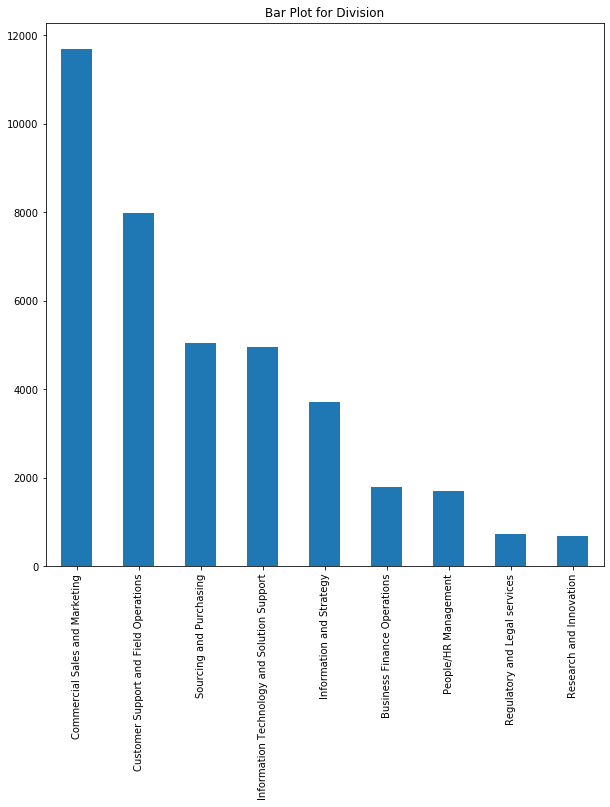

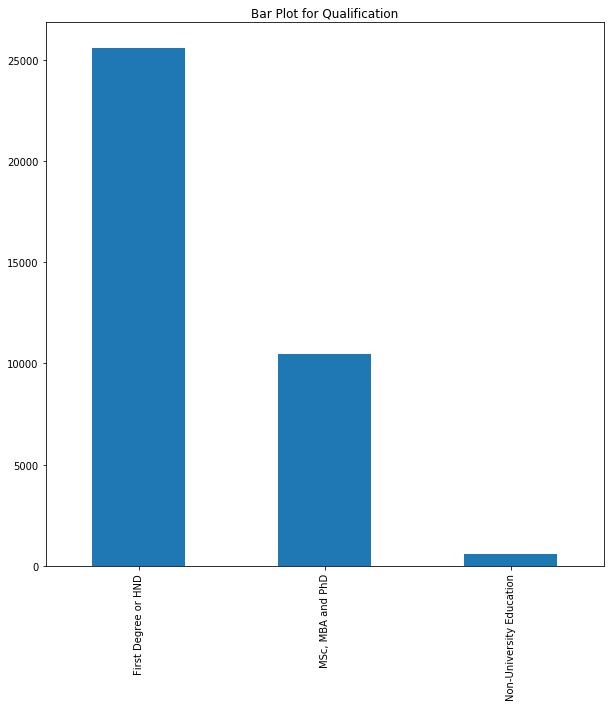

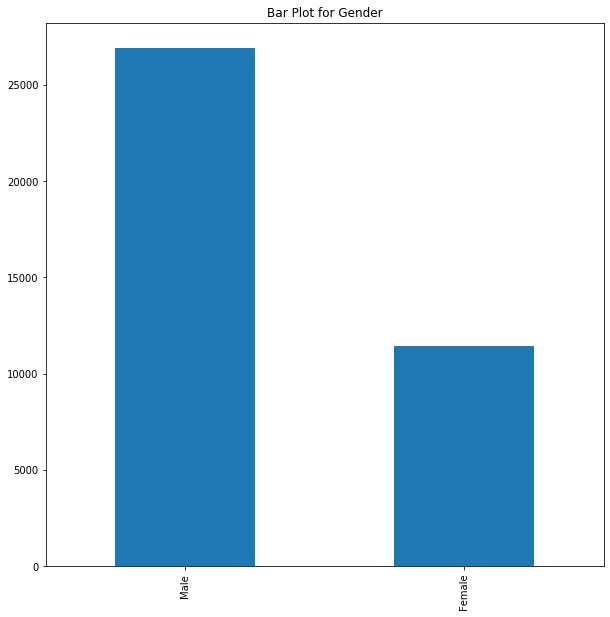

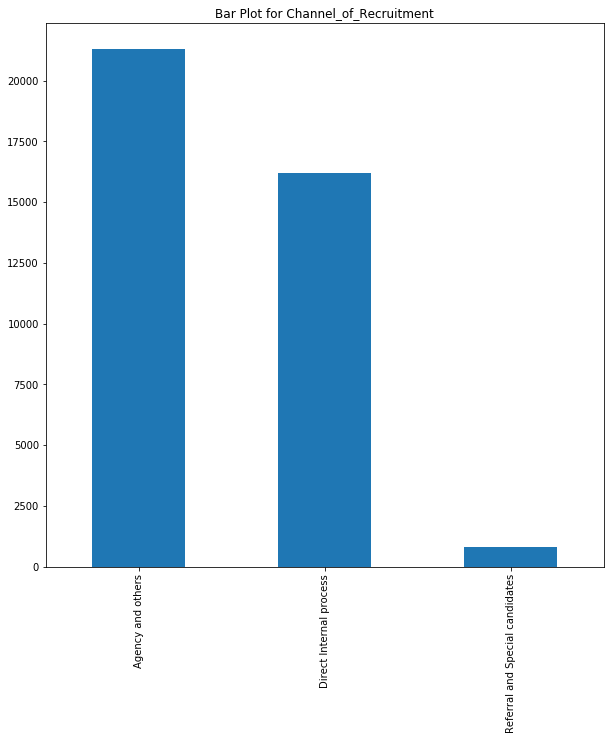

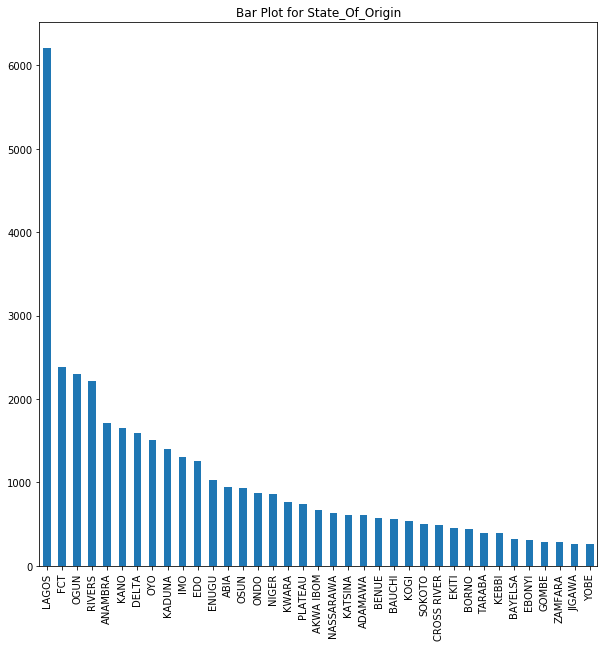

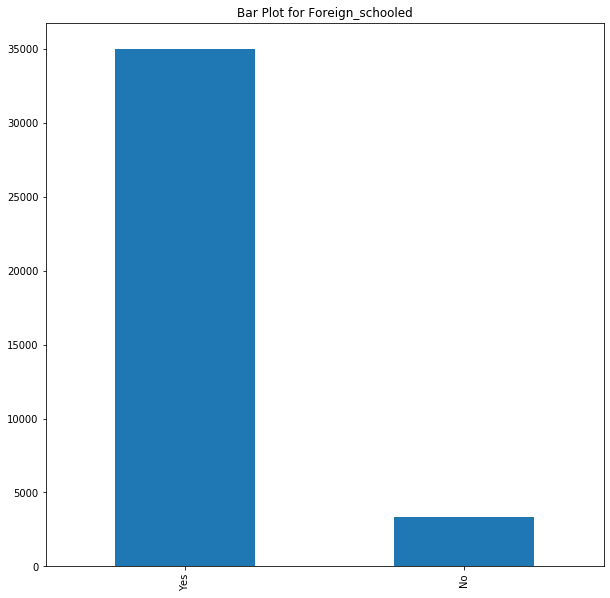

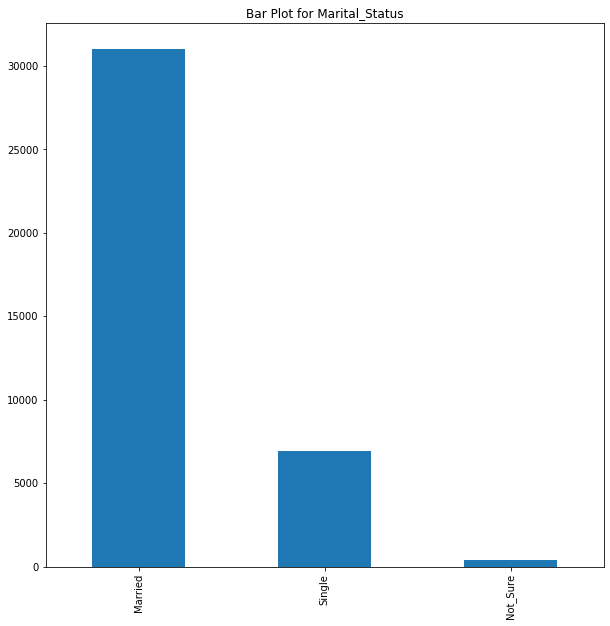

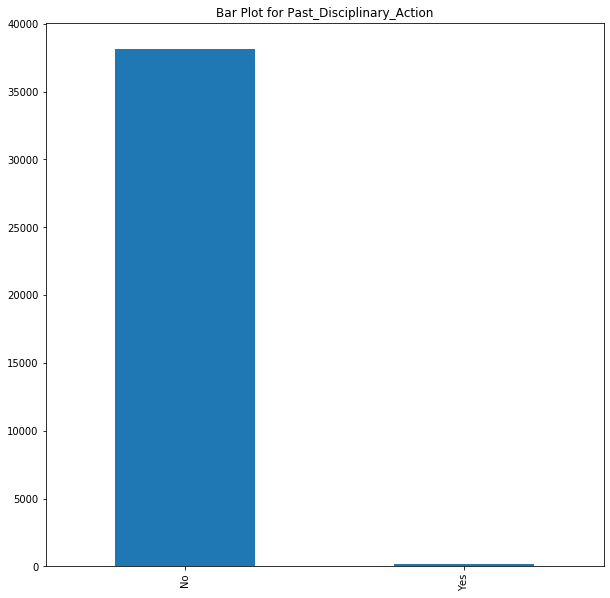

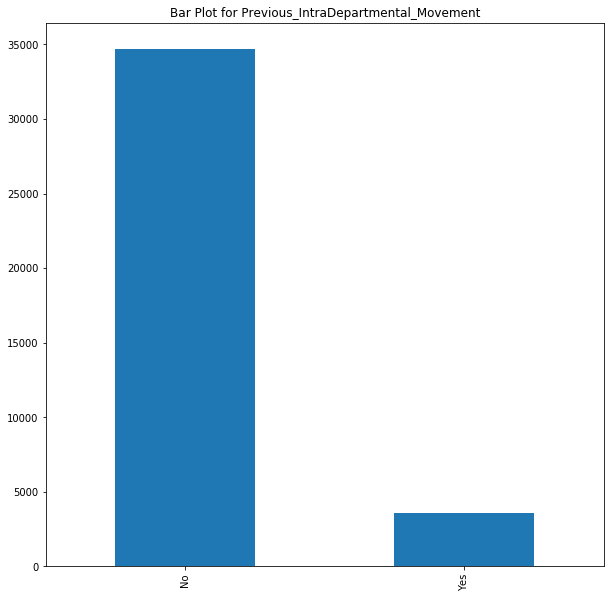

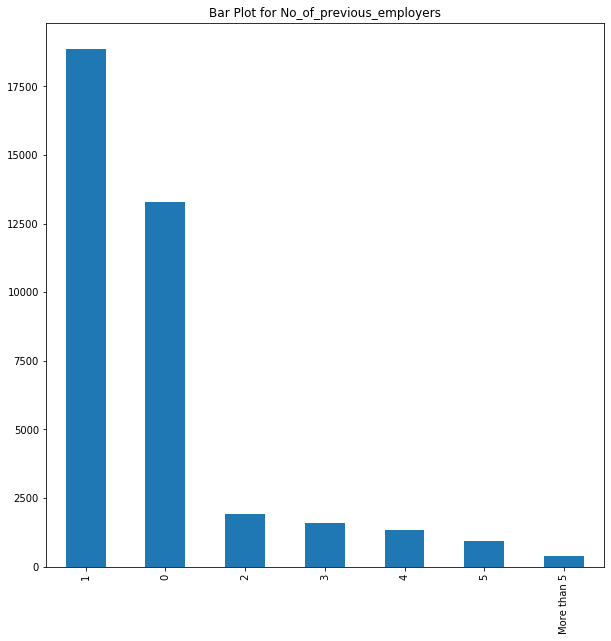

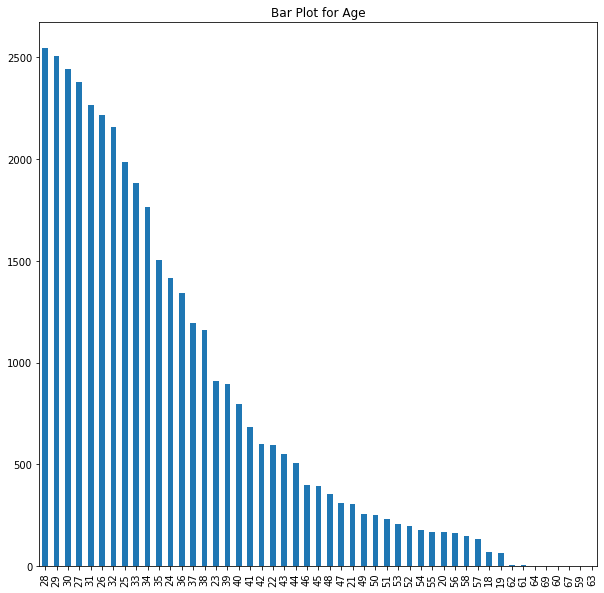

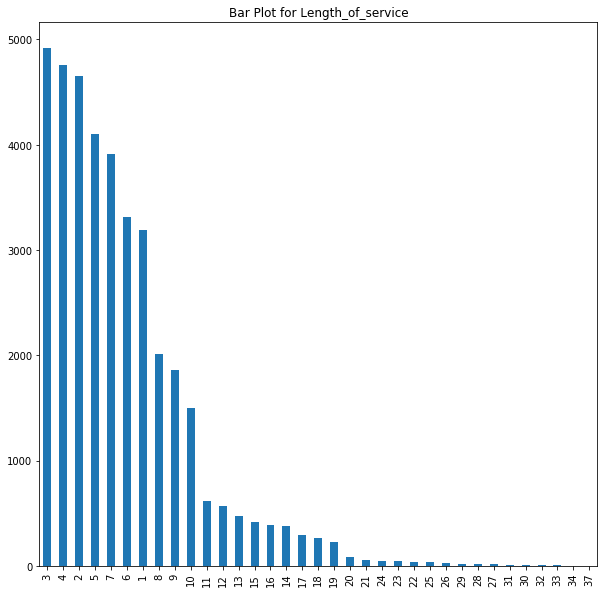

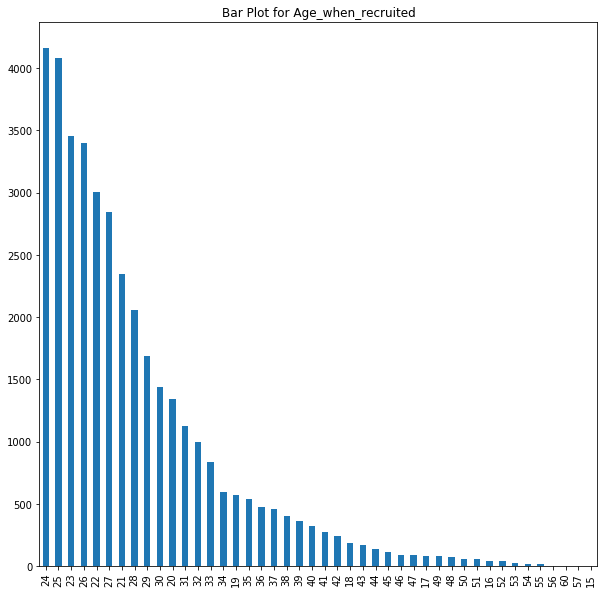

In [8]:
#Gaining insights from the categorical columns
for col in cat_cols:
    print('Value count for', col)
    print(training_data[col].value_counts()) 
    print("_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_")
    print('                                 ')
    
for col in cat_cols:
    fig = plt.figure(figsize=(10,10))  
    ax = fig.gca() 
    
    counts = training_data[col].value_counts()
    counts.plot.bar(ax = ax) 
    ax.set_title('Bar Plot for ' + col)

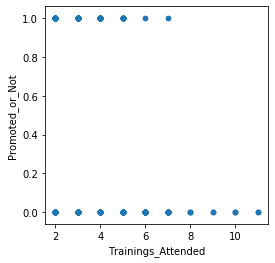

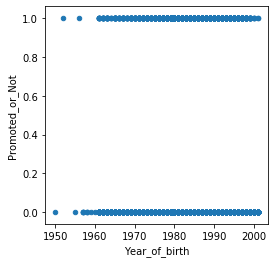

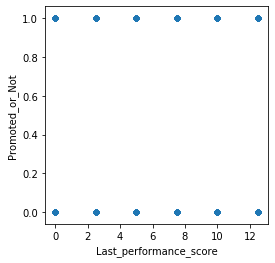

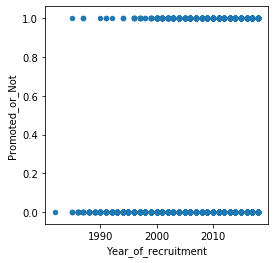

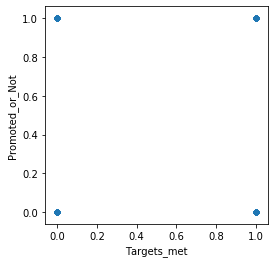

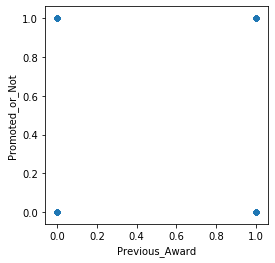

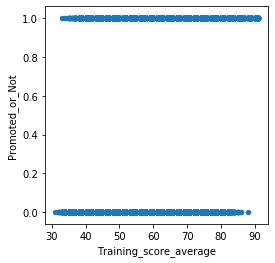

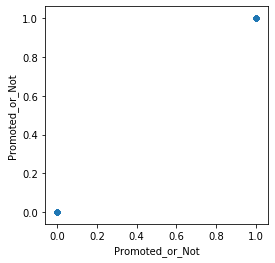

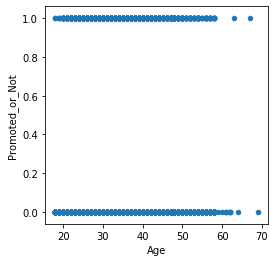

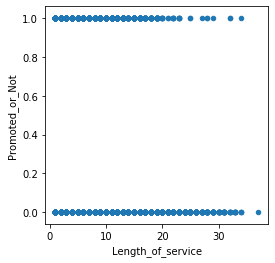

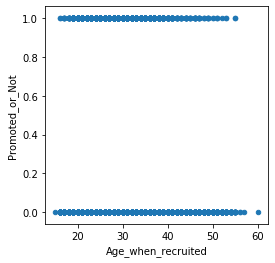

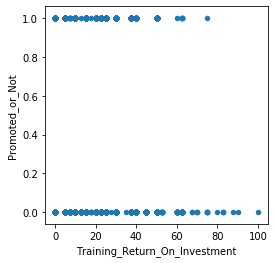

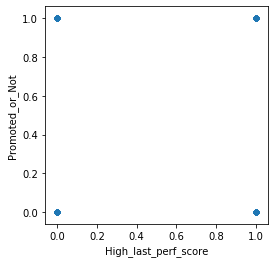

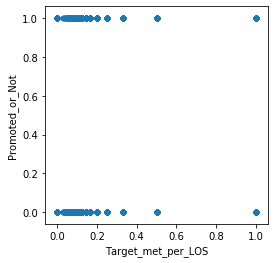

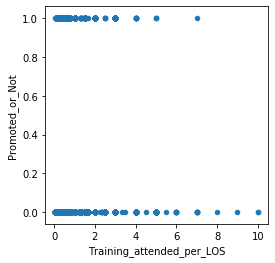

In [9]:
#Gaining Insights from the numerical data
for col in num_cols:
    fig = plt.figure(figsize = (4,4))   #define plot area
    ax = fig.gca() #define axis
    
    training_data.plot.scatter(x=col, y ='Promoted_or_Not', ax=ax)

In [10]:
# Dealing with Missing Values

# first let's replace all possible inf and -inf values with nan
training_data = training_data.replace([np.inf, -np.inf], np.nan)
test_data =test_data.replace([np.inf, -np.inf], np.nan)

#check for missing data
training_data.isnull().sum()

Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
Age                                       0
Length_of_service                         0
Age_when_recruited                        0
Training_Return_On_Investment             0
High_last_perf_score            

In [11]:
# Dealing with Missing Values

# first let's replace all possible inf and -inf values with nan
training_data = training_data.replace([np.inf, -np.inf], np.nan)
test_data =test_data.replace([np.inf, -np.inf], np.nan)

#check for missing data
training_data.isnull().sum()

Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
Age                                       0
Length_of_service                         0
Age_when_recruited                        0
Training_Return_On_Investment             0
High_last_perf_score            

In [12]:
##fill missing qualification with the most popular class
training_data['Qualification'] = training_data['Qualification'].fillna("First Degree or HND")
test_data['Qualification'] = test_data['Qualification'].fillna("First Degree or HND")

#replacing values 
training_data['Marital_Status'] = training_data['Marital_Status'].replace(['Not_Sure'], training_data['Marital_Status'].mode())
test_data['Marital_Status'] = test_data['Marital_Status'].replace(['Not_Sure'], test_data['Marital_Status'].mode())

#### Preparing for Mean Encoding

In [13]:
# Preparing for Mean Encoding
cat_col = training_data.select_dtypes(exclude=['int64','float64']).columns
cat_col = list(cat_col)
cat_col = test_data.select_dtypes(exclude=['int64','float64']).columns
cat_col = list(cat_col)

num_col = training_data.select_dtypes(exclude=['object']).columns
num_col = list(num_col)
num_col = test_data.select_dtypes(exclude=['object']).columns
num_col = list(num_col)

In [14]:
#Performing Mean Encoding on all the categorical features
xam_it = xam.feature_extraction.BayesianTargetEncoder(columns=cat_col)

y = training_data['Promoted_or_Not']
train_xam = training_data.drop('Promoted_or_Not', axis=1)
xam_it.fit(train_xam, y)

train_xam = xam_it.transform(train_xam)
test_xam = xam_it.transform(test_data)

In [15]:
train_xam.drop(columns= cat_col, inplace=True)
test_xam.drop(columns= cat_col, inplace=True)

In [16]:
train_xam.shape, test_xam.shape

((38312, 24), (16496, 24))

In [17]:
train_xam.head()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Age,Length_of_service,Age_when_recruited,...,Division_mean,Qualification_mean,Gender_mean,Channel_of_Recruitment_mean,State_Of_Origin_mean,Foreign_schooled_mean,Marital_Status_mean,Past_Disciplinary_Action_mean,Previous_IntraDepartmental_Movement_mean,No_of_previous_employers_mean
0,2,1986,12.5,2011,1,0,41,33,8,25,...,0.072019,0.096552,0.089010,0.083188,0.095281,0.081785,0.08523,0.084511,0.085336,0.082371
1,2,1991,12.5,2015,0,0,52,28,4,24,...,0.088252,0.079887,0.082708,0.084281,0.095281,0.084868,0.08523,0.084511,0.085336,0.082371
2,2,1987,7.5,2012,0,0,42,32,7,25,...,0.072019,0.079887,0.082708,0.083188,0.078964,0.084868,0.08523,0.084511,0.085336,0.082371
3,3,1982,2.5,2009,0,0,42,37,10,27,...,0.072019,0.079887,0.082708,0.084281,0.072580,0.084868,0.08175,0.084511,0.085336,0.085541
4,3,1990,7.5,2012,0,0,77,29,7,22,...,0.093290,0.079887,0.082708,0.083188,0.084682,0.084868,0.08523,0.084511,0.085336,0.085541


In [18]:
### Futher Features creation
train_xam['f1'] = train_xam['Previous_Award']+train_xam['Targets_met']
test_xam['f1'] = test_xam['Previous_Award']+test_xam['Targets_met']

train_xam['f2'] = train_xam['Division_mean']/train_xam['Training_score_average']
test_xam['f2'] = test_xam['Division_mean']/test_xam['Training_score_average']

train_xam['f3'] = train_xam['High_last_perf_score']+train_xam['Previous_Award']
test_xam['f3'] = test_xam['High_last_perf_score']+test_xam['Previous_Award']

train_xam['f4'] = train_xam['Division_mean']+train_xam['Training_score_average']
test_xam['f4'] = test_xam['Division_mean']+test_xam['Training_score_average']

train_xam['f5'] = train_xam['Division_mean']+train_xam['Previous_Award']
test_xam['f5'] = test_xam['Division_mean']+test_xam['Previous_Award']

train_xam['f6'] = train_xam['Trainings_Attended']%train_xam['Division_mean']
test_xam['f6'] = test_xam['Trainings_Attended']%test_xam['Division_mean']

train_xam['f7'] = train_xam['Targets_met']- train_xam['Training_score_average']
test_xam['f7'] = test_xam['Targets_met'] - test_xam['Training_score_average']

train_xam['f8'] = train_xam['Targets_met'] / train_xam['Training_score_average']
test_xam['f8'] = test_xam['Targets_met'] / test_xam['Training_score_average']

train_xam['f9'] = train_xam['High_last_perf_score']% train_xam['Division_mean']
test_xam['f9'] = test_xam['High_last_perf_score'] % test_xam['Division_mean']

train_xam['f10'] = train_xam['Gender_mean']% train_xam['Division_mean']
test_xam['f10'] = test_xam['Gender_mean'] % test_xam['Division_mean']

train_xam['f11'] = train_xam['Division_mean']-train_xam['Training_score_average']
test_xam['f11'] = test_xam['Division_mean']-test_xam['Training_score_average']

train_xam['f12'] = train_xam['Division_mean']+train_xam['Last_performance_score']
test_xam['f12'] = test_xam['Division_mean']+test_xam['Last_performance_score']

train_xam['f13'] = train_xam['Division_mean']%train_xam['Gender_mean']
test_xam['f13'] = test_xam['Division_mean']%test_xam['Gender_mean']

train_xam['f14'] = train_xam['Division_mean'] % train_xam['Qualification_mean']
test_xam['f14'] = test_xam['Division_mean'] % test_xam['Qualification_mean']

train_xam['f15'] = train_xam['Division_mean']/ train_xam['Training_score_average']
test_xam['f15'] = test_xam['Division_mean'] / test_xam['Training_score_average']

train_xam['f16'] = train_xam['Targets_met'] / train_xam['Age_when_recruited']
test_xam['f16'] = test_xam['Targets_met'] / test_xam['Age_when_recruited']

train_xam['f17'] = train_xam['Division_mean'] + train_xam['High_last_perf_score']
test_xam['f17'] = test_xam['Division_mean'] + test_xam['High_last_perf_score']

train_xam['f18'] = train_xam['Qualification_mean'] + train_xam['Target_met_per_LOS']
test_xam['f18'] = test_xam['Qualification_mean'] + test_xam['Target_met_per_LOS']

train_xam['f19'] = train_xam['Age'] - train_xam['Last_performance_score']
test_xam['f19'] = test_xam['Age'] - test_xam['Last_performance_score']

train_xam['f20'] = train_xam['Qualification_mean'] / train_xam['Age_when_recruited']
test_xam['f20'] = test_xam['Qualification_mean'] / test_xam['Age_when_recruited']

train_xam['f21'] = train_xam['Age'] - train_xam['Training_score_average']
test_xam['f21'] = test_xam['Age'] - test_xam['Training_score_average']

train_xam['f22'] = train_xam['Training_Return_On_Investment'] % train_xam['Age']
test_xam['f22'] = test_xam['Training_Return_On_Investment'] % test_xam['Age']

train_xam['f23'] = train_xam['Previous_Award'] + train_xam['Target_met_per_LOS']
test_xam['f23'] = test_xam['Previous_Award'] + test_xam['Target_met_per_LOS']

train_xam['f24'] = train_xam['Target_met_per_LOS'] / train_xam['Division_mean']
test_xam['f24'] = test_xam['Target_met_per_LOS'] / test_xam['Division_mean']

train_xam['f25'] = train_xam['Last_performance_score'] / train_xam['Age_when_recruited']
test_xam['f25'] = test_xam['Last_performance_score'] / test_xam['Age_when_recruited']

train_xam['f26'] = train_xam['Last_performance_score'] % train_xam['Length_of_service']
test_xam['f26'] = test_xam['Last_performance_score'] % test_xam['Length_of_service']

train_xam['f27'] = train_xam['Target_met_per_LOS'] / train_xam['Age_when_recruited']
test_xam['f27'] = test_xam['Target_met_per_LOS'] / test_xam['Age_when_recruited']

In [19]:
train_xam.head()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Age,Length_of_service,Age_when_recruited,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,2,1986,12.5,2011,1,0,41,33,8,25,...,0.221552,20.5,0.003862,-8,25.0,0.125,1.735663,0.500000,4.5,0.005
1,2,1991,12.5,2015,0,0,52,28,4,24,...,0.079887,15.5,0.003329,-24,25.0,0.000,0.000000,0.520833,0.5,0.000
2,2,1987,7.5,2012,0,0,42,32,7,25,...,0.079887,24.5,0.003195,-10,15.0,0.000,0.000000,0.300000,0.5,0.000
3,3,1982,2.5,2009,0,0,42,37,10,27,...,0.079887,34.5,0.002959,-5,7.5,0.000,0.000000,0.092593,2.5,0.000
4,3,1990,7.5,2012,0,0,77,29,7,22,...,0.079887,21.5,0.003631,-48,22.5,0.000,0.000000,0.340909,0.5,0.000


In [20]:
z = pd.concat([train_xam, y], axis=1)

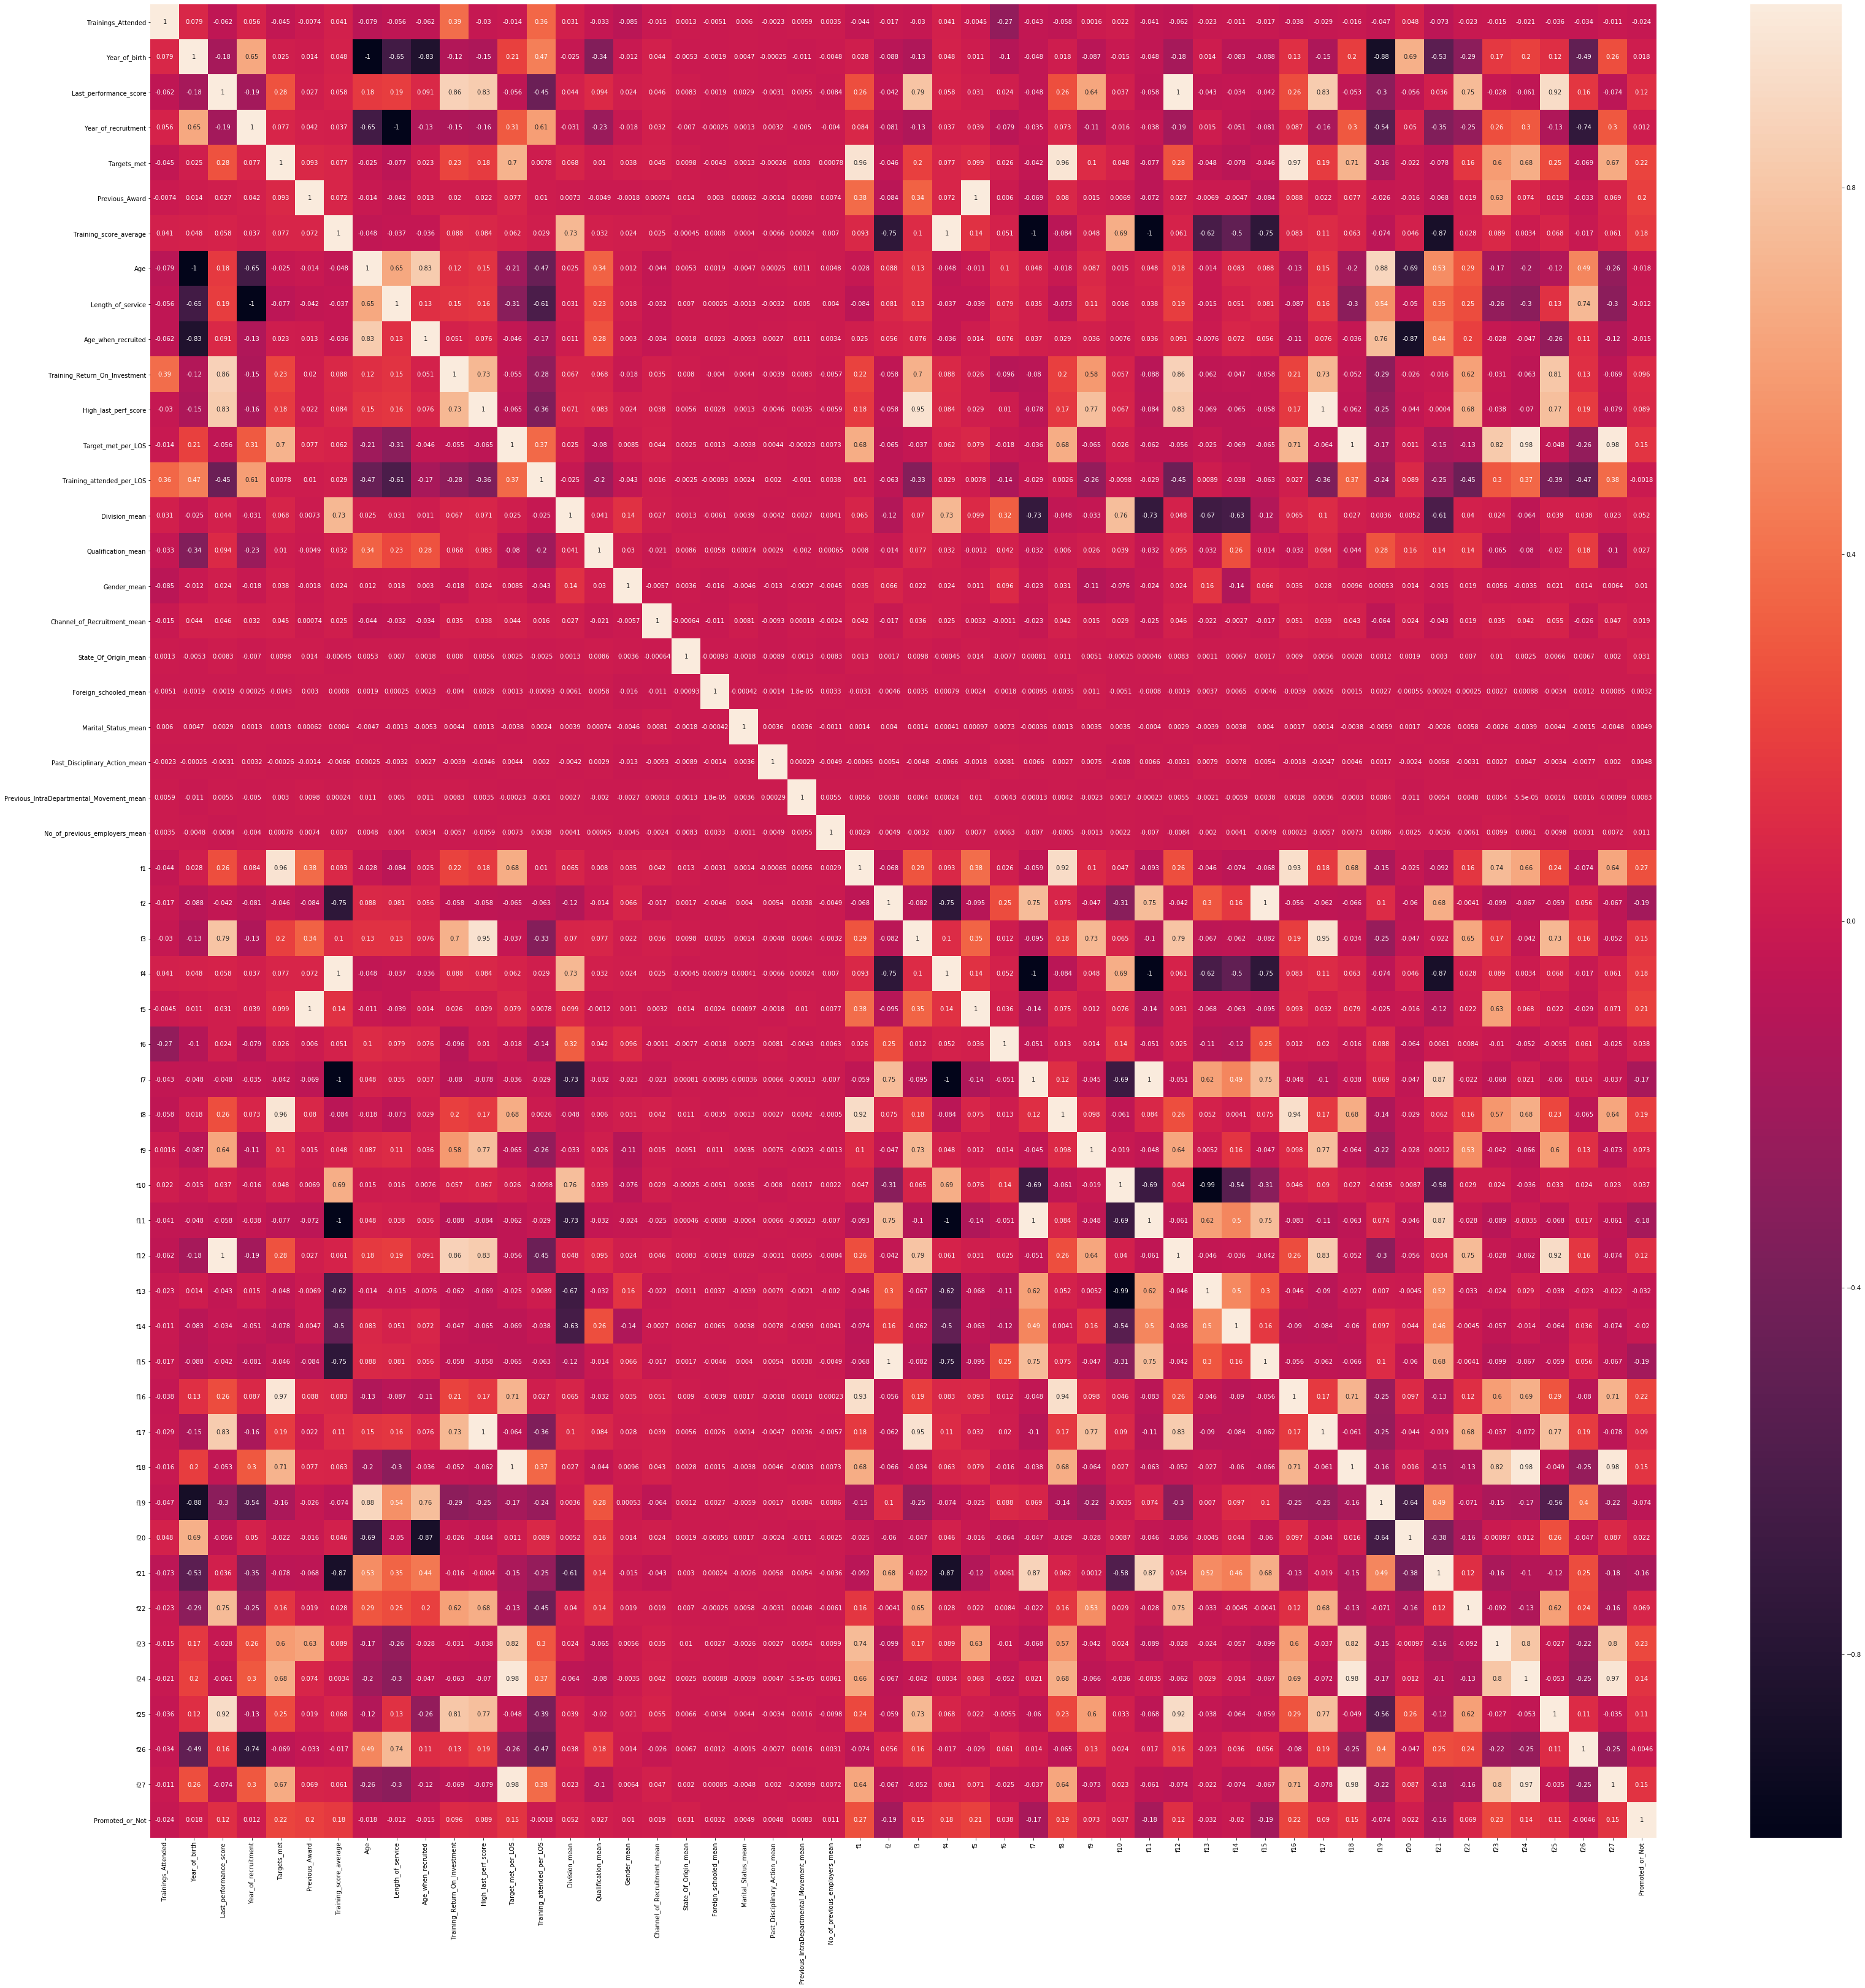

In [21]:
cor = z.corr()
plt.figure(figsize=(55,55))
sns.heatmap(cor, annot=True)

In [22]:
col_2_drop = ['Year_of_birth','Year_of_recruitment','State_Of_Origin_mean','Gender_mean','Channel_of_Recruitment_mean','Previous_IntraDepartmental_Movement_mean',
             'Foreign_schooled_mean','Marital_Status_mean', 'Past_Disciplinary_Action_mean',
             'No_of_previous_employers_mean']

In [23]:
train_xam = train_xam.drop(col_2_drop, axis = 1)
test_xam = test_xam.drop(col_2_drop, axis = 1)

In [24]:
train_xam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 41 columns):
Trainings_Attended               38312 non-null int64
Last_performance_score           38312 non-null float64
Targets_met                      38312 non-null int64
Previous_Award                   38312 non-null int64
Training_score_average           38312 non-null int64
Age                              38312 non-null int64
Length_of_service                38312 non-null int64
Age_when_recruited               38312 non-null int64
Training_Return_On_Investment    38312 non-null float64
High_last_perf_score             38312 non-null int64
Target_met_per_LOS               38312 non-null float64
Training_attended_per_LOS        38312 non-null float64
Division_mean                    38312 non-null float64
Qualification_mean               38312 non-null float64
f1                               38312 non-null int64
f2                               38312 non-null float64
f3           

In [25]:
train_xam.shape

(38312, 41)

### Exploratory Data Analysis

In [26]:
train_xam.describe()

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Age,Length_of_service,Age_when_recruited,Training_Return_On_Investment,High_last_perf_score,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,...,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,7.698959,0.352996,0.023152,55.366465,32.790666,5.860305,26.930361,17.209425,0.734444,...,0.190537,25.091708,0.003249,-22.575799,15.034676,0.129122,1.277786,0.294601,2.631956,0.004161
std,0.609443,3.744135,0.477908,0.150388,13.362741,7.646047,4.261451,5.827495,9.452231,0.441635,...,0.203259,7.901145,0.000577,15.713470,8.249044,0.262335,2.538247,0.155133,2.729604,0.008421
min,2.000000,0.000000,0.000000,0.000000,31.000000,18.000000,1.000000,15.000000,0.000000,0.000000,...,0.079887,5.500000,0.001452,-68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,0.000000,0.000000,43.000000,27.000000,3.000000,23.000000,10.000000,0.000000,...,0.079887,19.500000,0.002926,-34.000000,10.000000,0.000000,0.000000,0.197368,0.500000,0.000000
50%,2.000000,7.500000,0.000000,0.000000,52.000000,31.000000,5.000000,25.000000,15.000000,1.000000,...,0.096552,24.000000,0.003329,-20.000000,15.000000,0.000000,0.000000,0.300000,2.000000,0.000000
75%,2.000000,10.000000,1.000000,0.000000,68.000000,37.000000,7.000000,29.000000,25.000000,1.000000,...,0.239409,29.000000,0.003631,-11.000000,20.000000,0.166667,1.744332,0.400000,3.500000,0.005714
max,11.000000,12.500000,1.000000,1.000000,91.000000,69.000000,37.000000,60.000000,100.000000,1.000000,...,1.096552,61.500000,0.006437,23.000000,50.000000,2.000000,17.106094,0.781250,12.500000,0.058824


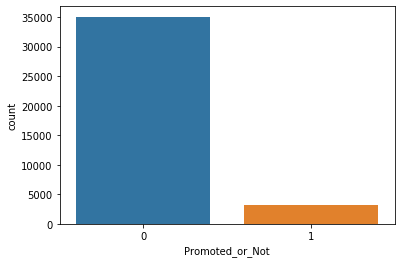

In [27]:
sns.countplot(y) #To check if the data is balanced

In [28]:
sm = SMOTE(random_state=42, ratio = 1.0)
xresample, yresample = sm.fit_sample(train_xam,y)

In [29]:
#splitting the training data
xtrain, xtest, ytrain, ytest = train_test_split(xresample,yresample, test_size=0.3, random_state=42)

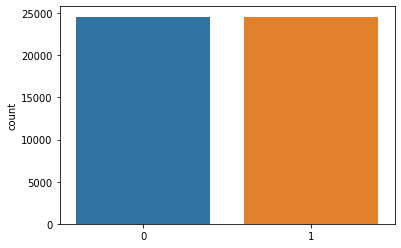

In [30]:
sns.countplot(ytrain)

In [31]:
# Applying Feature Engineering on the training set
scale = StandardScaler()

scale.fit(xtrain)
xtrain = scale.transform(xtrain)
xtest = scale.transform(xtest)

### Modeling on the Training Set

#### -_XGBoost_

In [33]:
score1 = cross_val_score(XGBClassifier(),xtrain, ytrain, cv=5, scoring='f1_macro')
score1.mean()

0.9178795086507623

In [32]:
# With XGBoost
xgb = XGBClassifier(n_estimators=400, max_depth= 4)
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest).astype(int)
print('F1 score:' ,f1_score(ytest, xgb_pred))
print('Recall: ',recall_score(ytest, xgb_pred))
print(classification_report(ytest, xgb_pred))
print(confusion_matrix(ytest, xgb_pred))

F1 score: 0.9625073227885178
Recall:  0.9349393019726859
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10499
           1       0.99      0.93      0.96     10544

    accuracy                           0.96     21043
   macro avg       0.96      0.96      0.96     21043
weighted avg       0.97      0.96      0.96     21043

[[10417    82]
 [  686  9858]]


#### - _lightLGB_

In [39]:
#Performing Cross Validation of 5 folds
score2 = cross_val_score(LGBMClassifier(),xtrain, ytrain, cv=5, scoring='f1_macro')
score2.mean()

0.9607564558983264

In [33]:
# With LightLGB
lgb = LGBMClassifier(n_estimators=470)
lgb.fit(xtrain, ytrain)
lgb_pred = lgb.predict(xtest).astype(int)
print('F1 score:' ,f1_score(ytest, lgb_pred))
print('Recall: ',recall_score(ytest, lgb_pred))
print(classification_report(ytest, lgb_pred))
print(confusion_matrix(ytest, lgb_pred))

F1 score: 0.9662725334367127
Recall:  0.9455614567526556
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10499
           1       0.99      0.95      0.97     10544

    accuracy                           0.97     21043
   macro avg       0.97      0.97      0.97     21043
weighted avg       0.97      0.97      0.97     21043

[[10377   122]
 [  574  9970]]


#### - _CatBoost_

In [ ]:
# #Performing Cross Validation of 5 folds
# score3 = cross_val_score(CatBoostClassifier(),xtrain, ytrain, cv=5, scoring='f1_macro')
# score3.mean()

In [43]:
# With CatBoost
cat = CatBoostClassifier(random_state=42,iterations=1000, use_best_model=True,eval_metric='F1')
cat.fit(xtrain, ytrain, eval_set = (xtest, ytest))

Learning rate set to 0.117439
0:	learn: 0.8359698	test: 0.8365016	best: 0.8365016 (0)	total: 162ms	remaining: 2m 41s
1:	learn: 0.8448159	test: 0.8447988	best: 0.8447988 (1)	total: 283ms	remaining: 2m 21s
2:	learn: 0.8464295	test: 0.8476218	best: 0.8476218 (2)	total: 378ms	remaining: 2m 5s
3:	learn: 0.8542273	test: 0.8520522	best: 0.8520522 (3)	total: 477ms	remaining: 1m 58s
4:	learn: 0.8557363	test: 0.8534387	best: 0.8534387 (4)	total: 589ms	remaining: 1m 57s
5:	learn: 0.8639970	test: 0.8614683	best: 0.8614683 (5)	total: 688ms	remaining: 1m 53s
6:	learn: 0.8661082	test: 0.8631819	best: 0.8631819 (6)	total: 851ms	remaining: 2m
7:	learn: 0.8650900	test: 0.8626694	best: 0.8631819 (6)	total: 955ms	remaining: 1m 58s
8:	learn: 0.8677907	test: 0.8648554	best: 0.8648554 (8)	total: 1.05s	remaining: 1m 55s
9:	learn: 0.8675339	test: 0.8644901	best: 0.8648554 (8)	total: 1.16s	remaining: 1m 54s
10:	learn: 0.8702544	test: 0.8674327	best: 0.8674327 (10)	total: 1.27s	remaining: 1m 54s
11:	learn: 0.872

94:	learn: 0.9522195	test: 0.9503057	best: 0.9503057 (94)	total: 11.2s	remaining: 1m 46s
95:	learn: 0.9529761	test: 0.9510007	best: 0.9510007 (95)	total: 11.4s	remaining: 1m 47s
96:	learn: 0.9532041	test: 0.9512123	best: 0.9512123 (96)	total: 11.5s	remaining: 1m 47s
97:	learn: 0.9532263	test: 0.9511654	best: 0.9512123 (96)	total: 11.6s	remaining: 1m 46s
98:	learn: 0.9531740	test: 0.9514707	best: 0.9514707 (98)	total: 11.8s	remaining: 1m 47s
99:	learn: 0.9532124	test: 0.9516677	best: 0.9516677 (99)	total: 11.9s	remaining: 1m 47s
100:	learn: 0.9537706	test: 0.9523950	best: 0.9523950 (100)	total: 12.1s	remaining: 1m 47s
101:	learn: 0.9537745	test: 0.9524466	best: 0.9524466 (101)	total: 12.2s	remaining: 1m 47s
102:	learn: 0.9540325	test: 0.9525966	best: 0.9525966 (102)	total: 12.3s	remaining: 1m 46s
103:	learn: 0.9537125	test: 0.9519212	best: 0.9525966 (102)	total: 12.4s	remaining: 1m 47s
104:	learn: 0.9541315	test: 0.9523247	best: 0.9525966 (102)	total: 12.6s	remaining: 1m 47s
105:	learn:

186:	learn: 0.9607383	test: 0.9586014	best: 0.9586014 (186)	total: 22.7s	remaining: 1m 38s
187:	learn: 0.9606994	test: 0.9586525	best: 0.9586525 (187)	total: 22.8s	remaining: 1m 38s
188:	learn: 0.9607570	test: 0.9585032	best: 0.9586525 (187)	total: 22.9s	remaining: 1m 38s
189:	learn: 0.9609073	test: 0.9585502	best: 0.9586525 (187)	total: 23s	remaining: 1m 37s
190:	learn: 0.9609528	test: 0.9585072	best: 0.9586525 (187)	total: 23.1s	remaining: 1m 37s
191:	learn: 0.9609326	test: 0.9585072	best: 0.9586525 (187)	total: 23.2s	remaining: 1m 37s
192:	learn: 0.9609326	test: 0.9585584	best: 0.9586525 (187)	total: 23.3s	remaining: 1m 37s
193:	learn: 0.9609123	test: 0.9585584	best: 0.9586525 (187)	total: 23.4s	remaining: 1m 37s
194:	learn: 0.9608058	test: 0.9586014	best: 0.9586525 (187)	total: 23.5s	remaining: 1m 37s
195:	learn: 0.9608058	test: 0.9586485	best: 0.9586525 (187)	total: 23.6s	remaining: 1m 36s
196:	learn: 0.9609408	test: 0.9588489	best: 0.9588489 (196)	total: 23.7s	remaining: 1m 36s
1

277:	learn: 0.9632003	test: 0.9617984	best: 0.9617984 (273)	total: 31.5s	remaining: 1m 21s
278:	learn: 0.9632221	test: 0.9618455	best: 0.9618455 (278)	total: 31.7s	remaining: 1m 21s
279:	learn: 0.9633283	test: 0.9619472	best: 0.9619472 (279)	total: 31.7s	remaining: 1m 21s
280:	learn: 0.9633064	test: 0.9618964	best: 0.9619472 (279)	total: 31.8s	remaining: 1m 21s
281:	learn: 0.9633283	test: 0.9619943	best: 0.9619943 (281)	total: 31.9s	remaining: 1m 21s
282:	learn: 0.9633486	test: 0.9619943	best: 0.9619943 (281)	total: 32s	remaining: 1m 21s
283:	learn: 0.9633517	test: 0.9620452	best: 0.9620452 (283)	total: 32.1s	remaining: 1m 20s
284:	learn: 0.9634344	test: 0.9621468	best: 0.9621468 (284)	total: 32.2s	remaining: 1m 20s
285:	learn: 0.9634344	test: 0.9621468	best: 0.9621468 (284)	total: 32.3s	remaining: 1m 20s
286:	learn: 0.9634547	test: 0.9619509	best: 0.9621468 (284)	total: 32.4s	remaining: 1m 20s
287:	learn: 0.9634766	test: 0.9621034	best: 0.9621468 (284)	total: 32.5s	remaining: 1m 20s
2

370:	learn: 0.9642218	test: 0.9623103	best: 0.9624119 (367)	total: 41s	remaining: 1m 9s
371:	learn: 0.9642218	test: 0.9622632	best: 0.9624119 (367)	total: 41.1s	remaining: 1m 9s
372:	learn: 0.9642218	test: 0.9622632	best: 0.9624119 (367)	total: 41.2s	remaining: 1m 9s
373:	learn: 0.9642218	test: 0.9622632	best: 0.9624119 (367)	total: 41.2s	remaining: 1m 8s
374:	learn: 0.9642218	test: 0.9622632	best: 0.9624119 (367)	total: 41.3s	remaining: 1m 8s
375:	learn: 0.9642000	test: 0.9622632	best: 0.9624119 (367)	total: 41.4s	remaining: 1m 8s
376:	learn: 0.9642000	test: 0.9622632	best: 0.9624119 (367)	total: 41.5s	remaining: 1m 8s
377:	learn: 0.9642000	test: 0.9622632	best: 0.9624119 (367)	total: 41.5s	remaining: 1m 8s
378:	learn: 0.9642218	test: 0.9622632	best: 0.9624119 (367)	total: 41.6s	remaining: 1m 8s
379:	learn: 0.9642436	test: 0.9622632	best: 0.9624119 (367)	total: 41.7s	remaining: 1m 8s
380:	learn: 0.9642436	test: 0.9622632	best: 0.9624119 (367)	total: 41.8s	remaining: 1m 7s
381:	learn: 

463:	learn: 0.9650049	test: 0.9627275	best: 0.9628180 (441)	total: 49.7s	remaining: 57.5s
464:	learn: 0.9650500	test: 0.9627275	best: 0.9628180 (441)	total: 49.9s	remaining: 57.4s
465:	learn: 0.9650297	test: 0.9627275	best: 0.9628180 (441)	total: 49.9s	remaining: 57.2s
466:	learn: 0.9650064	test: 0.9627782	best: 0.9628180 (441)	total: 50s	remaining: 57.1s
467:	learn: 0.9650064	test: 0.9627782	best: 0.9628180 (441)	total: 50.1s	remaining: 56.9s
468:	learn: 0.9650064	test: 0.9627782	best: 0.9628180 (441)	total: 50.1s	remaining: 56.8s
469:	learn: 0.9650485	test: 0.9628724	best: 0.9628724 (469)	total: 50.2s	remaining: 56.6s
470:	learn: 0.9650500	test: 0.9628724	best: 0.9628724 (469)	total: 50.3s	remaining: 56.5s
471:	learn: 0.9650500	test: 0.9628724	best: 0.9628724 (469)	total: 50.4s	remaining: 56.4s
472:	learn: 0.9650718	test: 0.9627275	best: 0.9628724 (469)	total: 50.5s	remaining: 56.3s
473:	learn: 0.9650718	test: 0.9629267	best: 0.9629267 (473)	total: 50.6s	remaining: 56.1s
474:	learn: 

558:	learn: 0.9656130	test: 0.9629304	best: 0.9632817 (526)	total: 56.8s	remaining: 44.8s
559:	learn: 0.9656391	test: 0.9630789	best: 0.9632817 (526)	total: 56.9s	remaining: 44.7s
560:	learn: 0.9656594	test: 0.9630789	best: 0.9632817 (526)	total: 57s	remaining: 44.6s
561:	learn: 0.9656594	test: 0.9630789	best: 0.9632817 (526)	total: 57s	remaining: 44.4s
562:	learn: 0.9656391	test: 0.9630789	best: 0.9632817 (526)	total: 57.1s	remaining: 44.3s
563:	learn: 0.9656376	test: 0.9631839	best: 0.9632817 (526)	total: 57.2s	remaining: 44.2s
564:	learn: 0.9654853	test: 0.9630825	best: 0.9632817 (526)	total: 57.3s	remaining: 44.1s
565:	learn: 0.9654853	test: 0.9630825	best: 0.9632817 (526)	total: 57.4s	remaining: 44s
566:	learn: 0.9654853	test: 0.9630825	best: 0.9632817 (526)	total: 57.4s	remaining: 43.8s
567:	learn: 0.9655042	test: 0.9630825	best: 0.9632817 (526)	total: 57.5s	remaining: 43.7s
568:	learn: 0.9655056	test: 0.9629811	best: 0.9632817 (526)	total: 57.6s	remaining: 43.6s
569:	learn: 0.96

650:	learn: 0.9658957	test: 0.9629992	best: 0.9633866 (597)	total: 1m 3s	remaining: 33.9s
651:	learn: 0.9658957	test: 0.9629992	best: 0.9633866 (597)	total: 1m 3s	remaining: 33.8s
652:	learn: 0.9658957	test: 0.9629992	best: 0.9633866 (597)	total: 1m 3s	remaining: 33.7s
653:	learn: 0.9659392	test: 0.9629992	best: 0.9633866 (597)	total: 1m 3s	remaining: 33.6s
654:	learn: 0.9659392	test: 0.9629992	best: 0.9633866 (597)	total: 1m 3s	remaining: 33.5s
655:	learn: 0.9659175	test: 0.9630499	best: 0.9633866 (597)	total: 1m 3s	remaining: 33.4s
656:	learn: 0.9659609	test: 0.9630969	best: 0.9633866 (597)	total: 1m 3s	remaining: 33.2s
657:	learn: 0.9659392	test: 0.9630969	best: 0.9633866 (597)	total: 1m 3s	remaining: 33.1s
658:	learn: 0.9659392	test: 0.9630969	best: 0.9633866 (597)	total: 1m 3s	remaining: 33s
659:	learn: 0.9658971	test: 0.9630969	best: 0.9633866 (597)	total: 1m 3s	remaining: 32.9s
660:	learn: 0.9658971	test: 0.9630969	best: 0.9633866 (597)	total: 1m 3s	remaining: 32.8s
661:	learn: 

743:	learn: 0.9666793	test: 0.9634730	best: 0.9636142 (732)	total: 1m 11s	remaining: 24.6s
744:	learn: 0.9666576	test: 0.9634730	best: 0.9636142 (732)	total: 1m 11s	remaining: 24.5s
745:	learn: 0.9666359	test: 0.9634730	best: 0.9636142 (732)	total: 1m 11s	remaining: 24.4s
746:	learn: 0.9666576	test: 0.9633789	best: 0.9636142 (732)	total: 1m 11s	remaining: 24.3s
747:	learn: 0.9666576	test: 0.9633789	best: 0.9636142 (732)	total: 1m 11s	remaining: 24.2s
748:	learn: 0.9666576	test: 0.9633789	best: 0.9636142 (732)	total: 1m 11s	remaining: 24.1s
749:	learn: 0.9666387	test: 0.9633319	best: 0.9636142 (732)	total: 1m 12s	remaining: 24s
750:	learn: 0.9666387	test: 0.9633789	best: 0.9636142 (732)	total: 1m 12s	remaining: 24s
751:	learn: 0.9666387	test: 0.9633789	best: 0.9636142 (732)	total: 1m 12s	remaining: 23.9s
752:	learn: 0.9666821	test: 0.9633789	best: 0.9636142 (732)	total: 1m 12s	remaining: 23.8s
753:	learn: 0.9666821	test: 0.9633789	best: 0.9636142 (732)	total: 1m 12s	remaining: 23.7s
754

836:	learn: 0.9669993	test: 0.9635200	best: 0.9636142 (732)	total: 1m 20s	remaining: 15.7s
837:	learn: 0.9669993	test: 0.9635200	best: 0.9636142 (732)	total: 1m 20s	remaining: 15.6s
838:	learn: 0.9669993	test: 0.9635200	best: 0.9636142 (732)	total: 1m 20s	remaining: 15.5s
839:	learn: 0.9669993	test: 0.9635200	best: 0.9636142 (732)	total: 1m 20s	remaining: 15.4s
840:	learn: 0.9669993	test: 0.9635200	best: 0.9636142 (732)	total: 1m 20s	remaining: 15.3s
841:	learn: 0.9669776	test: 0.9635200	best: 0.9636142 (732)	total: 1m 20s	remaining: 15.2s
842:	learn: 0.9669776	test: 0.9635200	best: 0.9636142 (732)	total: 1m 20s	remaining: 15.1s
843:	learn: 0.9669993	test: 0.9634188	best: 0.9636142 (732)	total: 1m 21s	remaining: 15s
844:	learn: 0.9670020	test: 0.9634730	best: 0.9636142 (732)	total: 1m 21s	remaining: 14.9s
845:	learn: 0.9670223	test: 0.9636142	best: 0.9636142 (732)	total: 1m 21s	remaining: 14.8s
846:	learn: 0.9669803	test: 0.9636177	best: 0.9636177 (846)	total: 1m 21s	remaining: 14.7s
8

929:	learn: 0.9676715	test: 0.9632087	best: 0.9636461 (879)	total: 1m 28s	remaining: 6.68s
930:	learn: 0.9676715	test: 0.9632087	best: 0.9636461 (879)	total: 1m 28s	remaining: 6.58s
931:	learn: 0.9676715	test: 0.9632087	best: 0.9636461 (879)	total: 1m 28s	remaining: 6.49s
932:	learn: 0.9676715	test: 0.9632087	best: 0.9636461 (879)	total: 1m 29s	remaining: 6.39s
933:	learn: 0.9676715	test: 0.9632557	best: 0.9636461 (879)	total: 1m 29s	remaining: 6.3s
934:	learn: 0.9676715	test: 0.9632557	best: 0.9636461 (879)	total: 1m 29s	remaining: 6.2s
935:	learn: 0.9676715	test: 0.9632087	best: 0.9636461 (879)	total: 1m 29s	remaining: 6.1s
936:	learn: 0.9676498	test: 0.9632087	best: 0.9636461 (879)	total: 1m 29s	remaining: 6.01s
937:	learn: 0.9676498	test: 0.9632087	best: 0.9636461 (879)	total: 1m 29s	remaining: 5.91s
938:	learn: 0.9677352	test: 0.9632593	best: 0.9636461 (879)	total: 1m 29s	remaining: 5.82s
939:	learn: 0.9677568	test: 0.9632593	best: 0.9636461 (879)	total: 1m 29s	remaining: 5.72s
94

In [34]:
cat = CatBoostClassifier(iterations=969,random_seed=1, silent=True)
cat.fit(xtrain, ytrain, eval_set = (xtest, ytest))
cat_pred = cat.predict(xtest).astype(int)
print('F1 score:' ,f1_score(ytest, cat_pred))
print('Recall: ',recall_score(ytest, cat_pred))
print(classification_report(ytest, cat_pred))
print(confusion_matrix(ytest, cat_pred))

F1 score: 0.9641410938186077
Recall:  0.9371206373292867
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10499
           1       0.99      0.94      0.96     10544

    accuracy                           0.97     21043
   macro avg       0.97      0.97      0.97     21043
weighted avg       0.97      0.97      0.97     21043

[[10427    72]
 [  663  9881]]


### Averaging All the models

In [35]:
xgb_df = pd.DataFrame(xgb_pred)
lgb_df = pd.DataFrame(lgb_pred)
cat_df = pd.DataFrame(cat_pred)

In [36]:
comb_df = pd.concat([xgb_df, lgb_df, cat_df], axis=1)
comb_df.head(10)

,0,0,0
0,1,1,1
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0
5,1,1,1
6,0,1,0
7,0,0,0
8,0,0,0
9,1,1,1


In [37]:
comb_pred = comb_df.mode(axis=1)
comb_pred.head(10)

,0
0,1
1,0
2,0
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [38]:
print('F1 score:' ,f1_score(ytest, comb_pred))
print('Recall: ',recall_score(ytest, comb_pred))
print(classification_report(ytest, comb_pred))
print(confusion_matrix(ytest, comb_pred))

F1 score: 0.9652381648871338
Recall:  0.9388277693474962
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10499
           1       0.99      0.94      0.97     10544

    accuracy                           0.97     21043
   macro avg       0.97      0.97      0.97     21043
weighted avg       0.97      0.97      0.97     21043

[[10431    68]
 [  645  9899]]


In [39]:
train_xam.shape

(38312, 41)

In [40]:
def run_XGB(xtrain, xtest, ytrain, ytest):
    
    clf =  XGBClassifier(n_estimators=400, max_depth= 4)
    
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print('For LightLGB Model')
    print('Accuracy: ', accuracy_score(ytest, ypred))
    print(confusion_matrix(ytest, ypred))
    print('F1 score:' ,f1_score(ytest, ypred))
    #print(classification_report(ytest, ypred))

In [41]:
def run_LGB(xtrain, xtest, ytrain, ytest):
    
    clf =  LGBMClassifier(n_estimators=470)
    
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print('For LightLGB Model')
    print('Accuracy: ', accuracy_score(ytest, ypred))
    print(confusion_matrix(ytest, ypred))
    print('F1 score:' ,f1_score(ytest, ypred))
    #print(classification_report(ytest, ypred))

In [42]:
def run_CAT(xtrain, xtest, ytrain, ytest):
    
    clf = CatBoostClassifier(iterations=969,random_seed=1, silent=True)
    
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print('For CatBoost Model')
    print('Accuracy: ', accuracy_score(ytest, ypred))
    print(confusion_matrix(ytest, ypred))
    print('F1 score:' ,f1_score(ytest, ypred))
    print(classification_report(ytest, ypred))

In [55]:
# for index in range(15, 41):
#     sel1 = RFE(XGBClassifier(), n_features_to_select = index)
#     sel1.fit(xtrain, ytrain)
#     sel1.get_support()
#     xtrain_rfe = sel1.transform(xtrain)
#     xtest_rfe = sel1.transform(xtest)
#     print('Selected Feature: ', index)
#     run_XGB(xtrain_rfe, xtest_rfe, ytrain, ytest)
#     print()

Selected Feature:  15
For LightLGB Model
Accuracy:  0.9584659981941739
[[10443    56]
 [  818  9726]]
F1 score: 0.957000885565286

Selected Feature:  16
For LightLGB Model
Accuracy:  0.9585610416765671
[[10412    87]
 [  785  9759]]
F1 score: 0.9572339382050024

Selected Feature:  17
For LightLGB Model
Accuracy:  0.9602718243596445
[[10428    71]
 [  765  9779]]
F1 score: 0.959007551240561

Selected Feature:  18
For LightLGB Model
Accuracy:  0.9601767808772513
[[10416    83]
 [  755  9789]]
F1 score: 0.958953761755486

Selected Feature:  19
For LightLGB Model
Accuracy:  0.9639309984317825
[[10444    55]
 [  704  9840]]
F1 score: 0.9628651108175547

Selected Feature:  20
For LightLGB Model
Accuracy:  0.9633607375374234
[[10439    60]
 [  711  9833]]
F1 score: 0.9622743064050496

Selected Feature:  21
For LightLGB Model
Accuracy:  0.9635508245022097
[[10435    64]
 [  703  9841]]
F1 score: 0.9624920534011443

Selected Feature:  22
For LightLGB Model
Accuracy:  0.9635983462434063
[[10432 

In [56]:
for index in range(15, 41):
    sel2 = RFE(LGBMClassifier(), n_features_to_select = index)
    sel2.fit(xtrain, ytrain)
    sel2.get_support()
    xtrain_rfe = sel2.transform(xtrain)
    xtest_rfe = sel2.transform(xtest)
    print('Selected Feature: ', index)
    run_LGB(xtrain_rfe, xtest_rfe, ytrain, ytest)
    print()

Selected Feature:  15
For LightLGB Model
Accuracy:  0.9664971724563988
[[10375   124]
 [  581  9963]]
F1 score: 0.9658281227279336

Selected Feature:  16
For LightLGB Model
Accuracy:  0.9663070854916124
[[10376   123]
 [  586  9958]]
F1 score: 0.9656242424242425

Selected Feature:  17
For LightLGB Model
Accuracy:  0.9669723898683648
[[10386   113]
 [  582  9962]]
F1 score: 0.966293224695669

Selected Feature:  18
For LightLGB Model
Accuracy:  0.9664496507152022
[[10375   124]
 [  582  9962]]
F1 score: 0.9657779932137663

Selected Feature:  19
For LightLGB Model
Accuracy:  0.966354607232809
[[10378   121]
 [  587  9957]]
F1 score: 0.9656677334885074

Selected Feature:  20
For LightLGB Model
Accuracy:  0.9666397376799886
[[10382   117]
 [  585  9959]]
F1 score: 0.9659553831231813

Selected Feature:  21
For LightLGB Model
Accuracy:  0.9664496507152022
[[10370   129]
 [  577  9967]]
F1 score: 0.9657945736434109

Selected Feature:  22
For LightLGB Model
Accuracy:  0.9657843463384499
[[10360

In [ ]:
for index in range(15, 41):
    sel3 = RFE(CatBoostClassifier(iterations=969,random_seed=1, silent=True), n_features_to_select = index)
    sel3.fit(xtrain, ytrain)
    sel3.get_support()
    xtrain_rfe = sel3.transform(xtrain)
    xtest_rfe = sel3.transform(xtest)
    print('Selected Feature: ', index)
    run_CAT(xtrain_rfe, xtest_rfe, ytrain, ytest)
    print()

### Modeling on the test sets

In [44]:
scale.fit(train_xam)
train = scale.transform(train_xam)
test = scale.transform(test_xam)

#### Predicting with XGBoost

In [45]:
xgb_now = RFE(XGBClassifier(n_estimators=400, max_depth= 4), n_features_to_select = 34)
xgb_now.fit(train,y)
predictions1 = xgb_now.predict(test)

#### Predicting with LightLGB

In [46]:
lgb_now = RFE(LGBMClassifier(n_estimators=470), n_features_to_select = 28)
lgb_now.fit(train,y)
predictions2 = lgb_now.predict(test)

#### Predicting with CatBoost

In [47]:
cat_now = RFE(CatBoostClassifier(iterations=969,random_seed=1, silent=True), n_features_to_select = 35)
cat_now.fit(train,y)
predictions3 = cat_now.predict(test).astype('int64')

### Single-attaching models to csv file

In [48]:
samp1 = pd.read_csv('sample_submission2.csv')
temp = pd.read_csv('test.csv')

samp1['EmployeeNo'] = temp['EmployeeNo']
samp1['Promoted_or_Not'] = predictions1.astype('int64')

# Check the value counts for our new predicted feature
samp1['Promoted_or_Not'].value_counts()

0    15953
1      543
Name: Promoted_or_Not, dtype: int64

In [49]:
samp1.to_csv("Final1.csv", index=False)

In [50]:
samp2 = pd.read_csv('sample_submission2.csv')
temp = pd.read_csv('test.csv')

samp2['EmployeeNo'] = temp['EmployeeNo']
samp2['Promoted_or_Not'] = predictions2.astype('int64')

# Check the value counts for our new predicted feature
samp2['Promoted_or_Not'].value_counts()

0    15873
1      623
Name: Promoted_or_Not, dtype: int64

In [51]:
samp2.to_csv("Final2.csv", index=False)

In [52]:
samp3 = pd.read_csv('sample_submission2.csv')
temp = pd.read_csv('test.csv')

samp3['EmployeeNo'] = temp['EmployeeNo']
samp3['Promoted_or_Not'] = predictions3.astype('int64')

# Check the value counts for our new predicted feature
samp3['Promoted_or_Not'].value_counts()

0    15977
1      519
Name: Promoted_or_Not, dtype: int64

In [53]:
samp3.to_csv("Final3.csv", index=False)

### Stacking all 3 predictions

In [54]:
### Combining all 3 predictions
xgb_dff = pd.DataFrame(predictions1)
lgb_dff = pd.DataFrame(predictions2)
cat_dff = pd.DataFrame(predictions3)

In [55]:
comb_dff = pd.concat([xgb_dff, lgb_dff, cat_dff], axis=1)
comb_dff.head(10)

,0,0,0
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [56]:
combined_pred = comb_dff.mode(axis=1)
combined_pred.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [57]:
sample = pd.read_csv('sample_submission2.csv')
temp = pd.read_csv('test.csv')

sample['EmployeeNo'] = temp['EmployeeNo']
sample['Promoted_or_Not'] = combined_pred.astype('int64')

# Check the value counts for our new predicted feature
sample['Promoted_or_Not'].value_counts()

0    15961
1      535
Name: Promoted_or_Not, dtype: int64

In [58]:
sample.to_csv("Last hero.csv", index=False)